<a href="https://colab.research.google.com/github/Mr-Abhinav/Black_Friday/blob/main/_Project_Black_Friday_Sale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

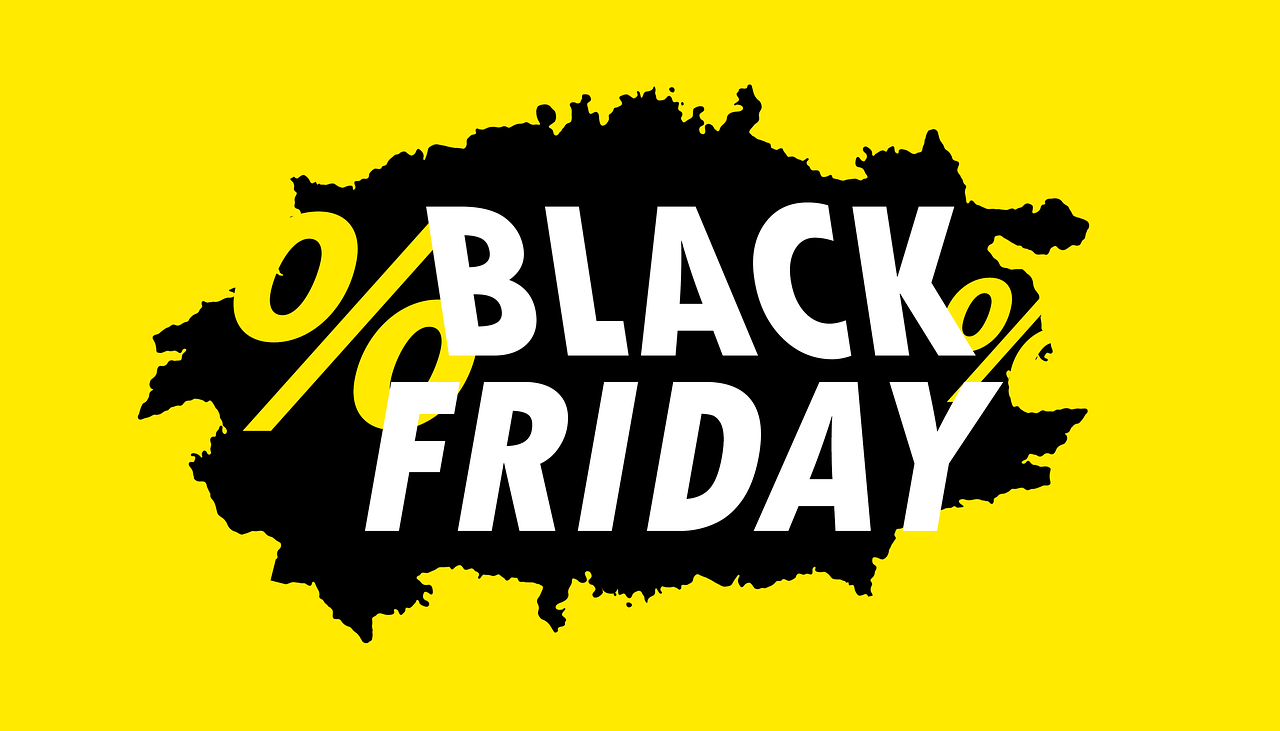

In [ ]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline

%matplotlib inline



In [ ]:
Black_Friday_Sale= pd.read_csv('/content/drive/MyDrive/Black_Friday.csv') #Mount Dataset


In [ ]:
df = Black_Friday_Sale

In [ ]:
df.shape

(550068, 12)

We have  -
*   **Columns**- 12
*   **Rows**- 550068



In [ ]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**User_ID:**

Unique ID of the user. There are a total of 5891 users in the dataset.

**Product_ID:**

Unique ID of the product. There are a total of 3623 products in the dataset.

**Gender:**

indicates the gender of the person making the transaction.

**Age:**

indicates the age group of the person making the transaction.

**Occupation:**

shows the occupation of the user, already labeled with numbers 0 to 20.

**City_Category:**

User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

**Stay_In_Current_City_Years:**

Indicates how long the users has lived in this city.

**Marital_Status:**

is 0 if the user is not married and 1 otherwise.

**Product_Category_1 to _3:**

Category of the product. All 3 are already labaled with numbers.

**Purchase:**
Purchase amount.

In [ ]:
df[df.duplicated()].shape              # Show no. of rows of duplicate rows duplicate rows

(0, 12)

In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [ ]:
df.drop(["User_ID"],axis = 1,inplace = True) #UserId column not relevent to our analysis then drop down the column

In [ ]:
df.columns

# **Handling Missing Values**

In [ ]:
df.isnull().sum().sort_values(ascending = False)[:6]   #Checking all null values

Product_Category_3    383247
Product_Category_2    173638
Product_ID                 0
Gender                     0
Age                        0
Occupation                 0
dtype: int64

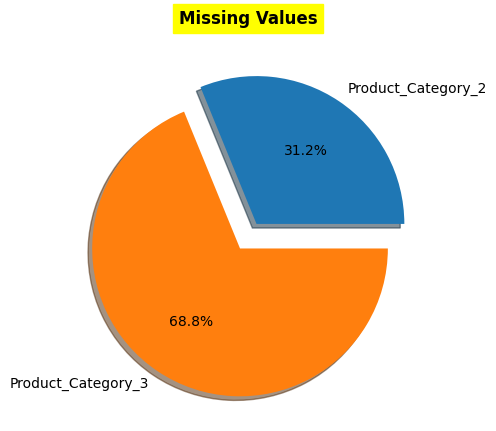

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Missing Values', backgroundcolor='yellow', pad =20, fontweight= "bold");

**Observation**


*   Only Product_Category_2 and Product_Category_3 have null values which is good news.
*   However Product_Category_3 is null for nearly 70% of transactions so it can't give us much information. so we gonna drop Product_Category_3.





In [ ]:
df[['Product_Category_3','Product_Category_2']] = df[['Product_Category_3','Product_Category_2']].fillna(0) #Removing all null values

In [ ]:
Missing_values=df.isnull().sum()
Percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'Missing_values':Missing_values,
    'Percent_missing':Percent_missing
}
Data_frame=pd.DataFrame(value)
Data_frame

,Missing_values,Percent_missing
Product_ID,0,0.0
Gender,0,0.0
Age,0,0.0
Occupation,0,0.0
City_Category,0,0.0
Stay_In_Current_City_Years,0,0.0
Marital_Status,0,0.0
Product_Category_1,0,0.0
Product_Category_2,0,0.0
Product_Category_3,0,0.0


import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_0, *['Missing_values', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_1, *['Percent_missing', 'count()', None], **{})
chart

In [ ]:
df.dtypes #For datatype

Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


In [ ]:
df[['Product_Category_2', 'Product_Category_3']] = df[['Product_Category_2', 'Product_Category_3']].astype('int64') # Change the datatype

In [ ]:
# show the numirical values

numirical_columns = [f for f in df.columns if df.dtypes[f] != 'object']
numirical_columns

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [ ]:
# show the categorical values

categorical_columns = [f for f in df.columns if df.dtypes[f] == 'object']
categorical_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [ ]:
df.describe(include='all')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
unique,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,6.735436,3.841941,9263.968713
std,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,6.215492,6.250712,5023.065394
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,12.000000
25%,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,14.000000,8.000000,12054.000000


**Observation**

*  Product P00265242 is the most popular product.
*   Most of the transactions were made by men.
*  Age group with most transactions was 26-35.
* City Category with most transactions was B.




In [ ]:
df.min() #Getting Minimum value of dataset

Product_ID                    P00000142
Gender                                F
Age                                0-17
Occupation                            0
City_Category                         A
Stay_In_Current_City_Years            0
Marital_Status                        0
Product_Category_1                    1
Product_Category_2                    0
Product_Category_3                    0
Purchase                             12
dtype: object

In [ ]:
df.max() #Getting Maximum value of dataset

Product_ID                    P0099942
Gender                               M
Age                                55+
Occupation                          20
City_Category                        C
Stay_In_Current_City_Years          4+
Marital_Status                       1
Product_Category_1                  20
Product_Category_2                  18
Product_Category_3                  18
Purchase                         23961
dtype: object

In [ ]:
# get index of first occurence of maximum Purchase value

df['Purchase'].idxmax()

87440

In [ ]:
# get the row with the maximum Purchase value

df.loc[df['Purchase'].idxmax()]

Product_ID                    P00052842
Gender                                M
Age                               26-35
Occupation                            4
City_Category                         A
Stay_In_Current_City_Years            2
Marital_Status                        1
Product_Category_1                   10
Product_Category_2                   15
Product_Category_3                    0
Purchase                          23961
Name: 87440, dtype: object

In [ ]:
# get the row with the minimum Purchase value

df.loc[df['Purchase'].idxmin()]

Product_ID                    P00370293
Gender                                F
Age                               26-35
Occupation                            2
City_Category                         A
Stay_In_Current_City_Years            1
Marital_Status                        1
Product_Category_1                   19
Product_Category_2                    0
Product_Category_3                    0
Purchase                             12
Name: 545946, dtype: object



*   Maximum Purchasing Product_ID is P00052842
*   Minimum Purchasing Product_ID is P00370293



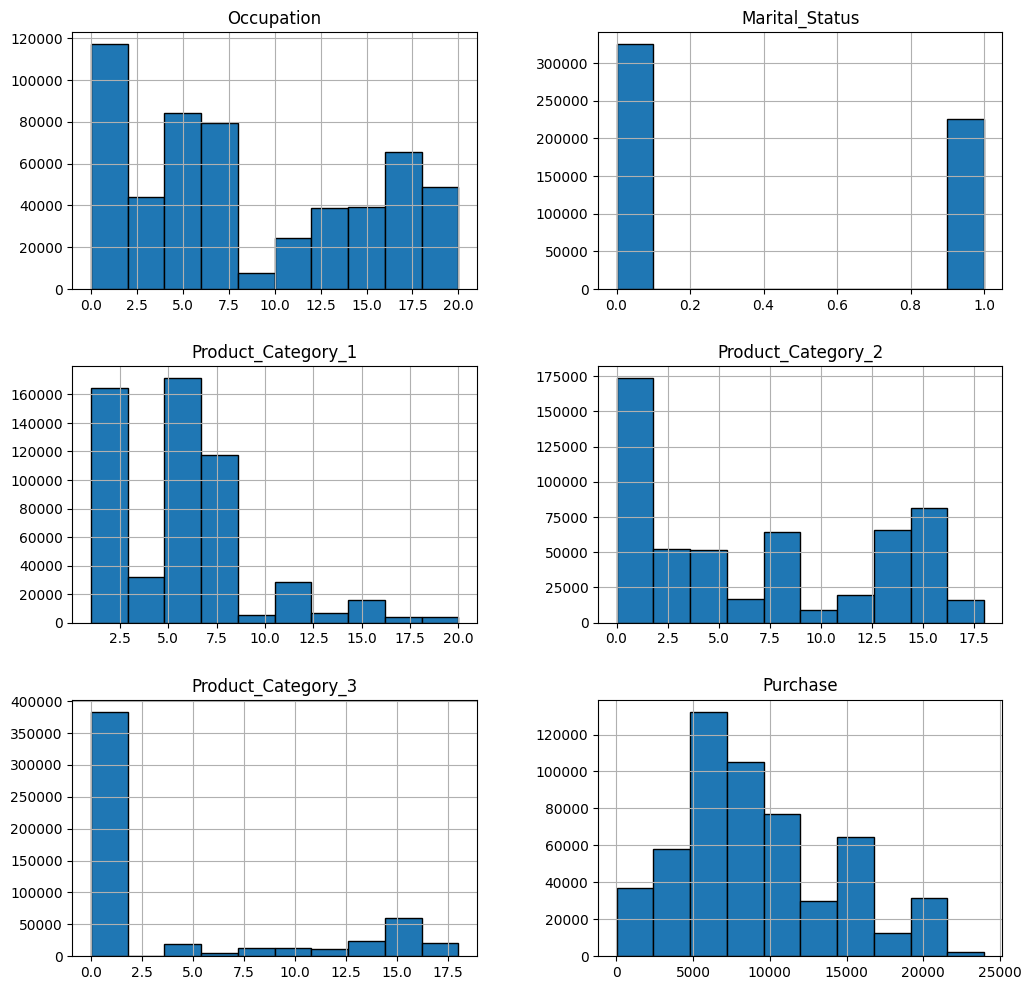

In [ ]:

df.hist(edgecolor='black',figsize=(12,12));

<Axes: title={'center': 'Purchase Distribution'}, ylabel='Frequency'>

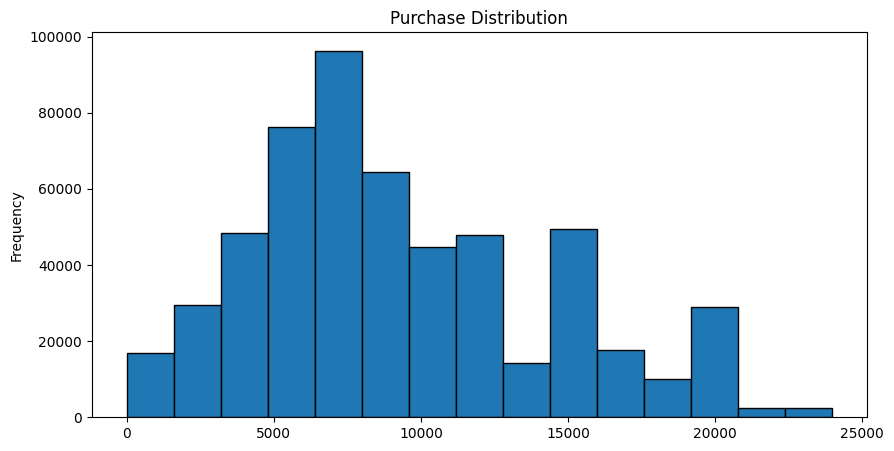

In [ ]:

purchase_d=df['Purchase']
purchase_d.plot(kind='hist',bins=15,
       edgecolor = 'black',figsize=(10,5),title='Purchase Distribution')

**Observation**

Most of the purchases are between 5K and 10k, we have some outliers purchases above 20000

# **Analysis by Gender**

In [ ]:
df['Gender'].value_counts(ascending=False)

M    414259
F    135809
Name: Gender, dtype: int64

<Axes: title={'center': 'Location wise population'}, xlabel='Gender', ylabel='City_Category'>

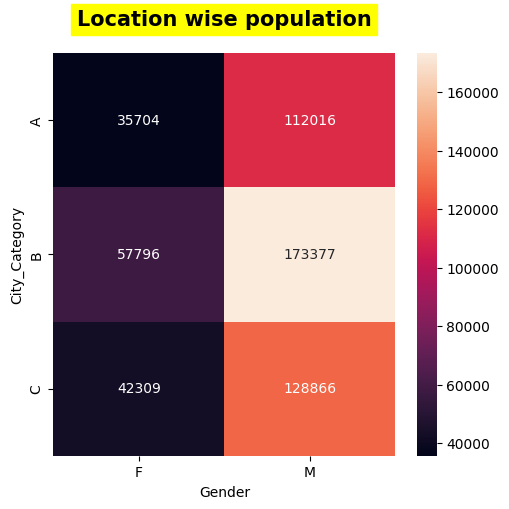

In [ ]:
fig, ax = plt.subplots( figsize=(5,5))
group = df.groupby(['City_Category', 'Gender'])
Gender = group.size().unstack()
ax.set_title("Location wise population", size=15,backgroundcolor='yellow', pad=20, fontweight ='bold')
fig.tight_layout()
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(Gender, annot = True, fmt ="d")

The **annot=True** parameter adds numerical annotations to the heatmap cells. The **fmt="d"** parameter formats the annotations as integers.

Overall, the code generates a heatmap with location-wise population information based on the grouped data from the df DataFrame. The seaborn library is used to create the heatmap, and additional formatting options are applied to the title.

**Observation**

Most of the population live in City_Category B.

Text(0.5, 1.0, 'Males vs Females by Total Purchases')

<Figure size 800x600 with 0 Axes>

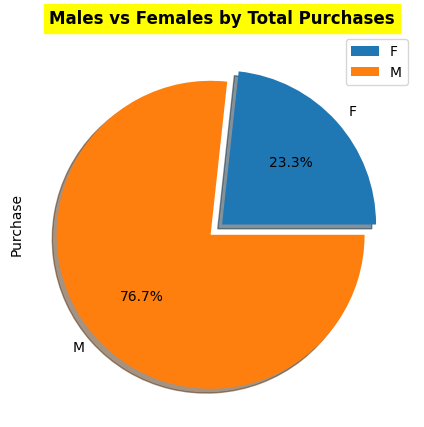

In [ ]:
# pie chart
plt.figure(figsize=(8, 6))
gender_pu=df[['Gender','Purchase']].groupby('Gender').sum()
explode = [0, 0.1]
gender_pu=df[['Gender','Purchase']].groupby('Gender').sum()
gender_pu
gender_pu.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(10,5), explode=explode, shadow = True)
plt.title("Males vs Females by Total Purchases",weight="bold",backgroundcolor='Yellow')

**%76.7 of customers are male and %23.3 of customers are female. On average, males spent more money.**

# **Analysis by Martial_Status**

In [ ]:
df['Marital_Status'].value_counts(ascending=True)

1    225337
0    324731
Name: Marital_Status, dtype: int64

<Axes: title={'center': 'Location wise Marital_Status'}, xlabel='Marital_Status', ylabel='City_Category'>

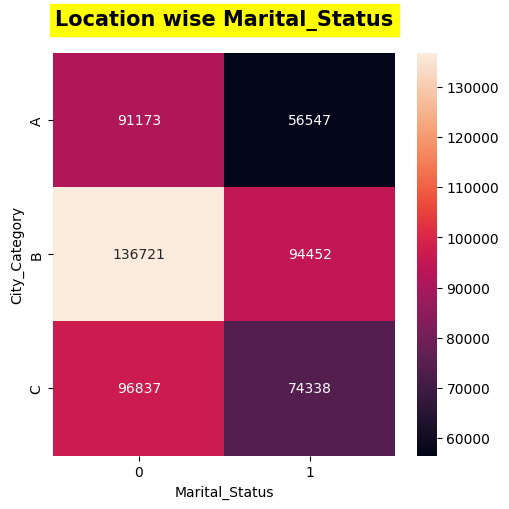

In [ ]:
fig, ax = plt.subplots( figsize=(5,5))
group = df.groupby(['City_Category', 'Marital_Status'])
Marital_Status = group.size().unstack()
ax.set_title("Location wise Marital_Status", size=15,backgroundcolor='yellow', pad=20, fontweight ='bold')
fig.tight_layout()
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(Marital_Status, annot = True, fmt ="d")

**Observation**

City_Category B play important role in purchase.

<Figure size 800x600 with 0 Axes>

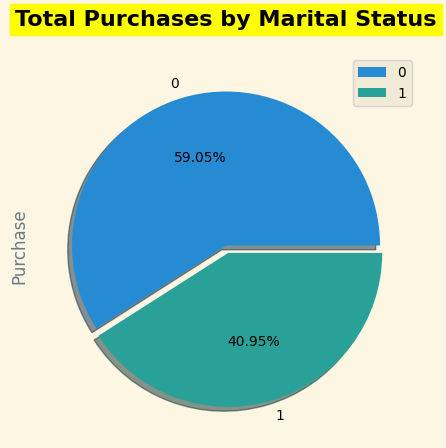

In [ ]:
plt.figure(figsize=(8, 6))
status_pu=df[['Marital_Status','Purchase']].groupby('Marital_Status').sum()
plt.style.use('Solarize_Light2')
explode = [0, 0.05]
status_pu.plot(kind='pie',autopct='%1.2f%%',subplots=True,figsize=(10,5),shadow = True, explode= explode)
plt.title("Total Purchases by Marital Status",weight="bold",backgroundcolor='Yellow', pad =20)
plt.show()

**Observation**

59.05% of the consumers martial status unmarried.



# **Analysis by Occupation**

In [ ]:
print('Different job designations altogether :', len(set(df['Occupation'])))

Different job designations altogether : 21


In [ ]:
df['Occupation'].value_counts(ascending = True)

8      1546
9      6291
18     6622
13     7728
19     8461
11    11586
15    12165
5     12177
10    12930
3     17650
6     20355
16    25371
2     26588
14    27309
12    31179
20    33562
17    40043
1     47426
7     59133
0     69638
4     72308
Name: Occupation, dtype: int64

In [ ]:
def Freq_df(word_list):
    Freq_dist_nltk = nltk.FreqDist(word_list)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient = 'index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by = ['Frequency'], ascending = False)
    df_freq = df_freq.reset_index()
    return df_freq

In [ ]:

def Word_Cloud(data, title):
    # Create a figure with a specified size
    plt.figure(figsize=(2, 3))

    # Create a WordCloud object with customization options
    wc = WordCloud(width=200, height=400, max_words=50,
                   background_color='white', max_font_size=100, random_state=42)

    # Generate the word cloud from the provided data (frequency data)
    wc.generate_from_frequencies(data)

    # Display the word cloud image
    plt.imshow(wc)

    # Set the title for the plot
    plt.title(title)

    # Turn off the axis for a cleaner display
    plt.axis('off')

    # Show the plot
    plt.show()


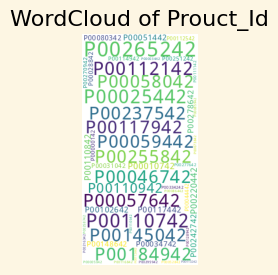

In [ ]:
freq_df = Freq_df(df['Product_ID'].values.tolist())
data = dict(zip(freq_df['Term'].tolist(), freq_df['Frequency'].tolist()))
data = freq_df.set_index('Term').to_dict()['Frequency']

Word_Cloud(data , 'WordCloud of Prouct_Id')

Text(0.5, 1.0, 'Occupation count')

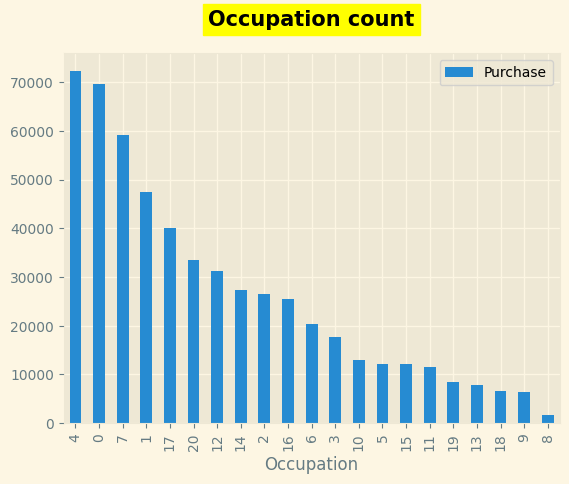

In [ ]:
ocu_count=df[['Occupation','Purchase']].groupby('Occupation').count()
ocu_count=ocu_count.sort_values(by='Purchase',ascending=False)
ocu_count.plot(kind='bar')

plt.title("Occupation count",weight="bold",size=15, backgroundcolor='Yellow', pad =20)

Text(0.5, 1.0, 'Total Purchase by Occupation')

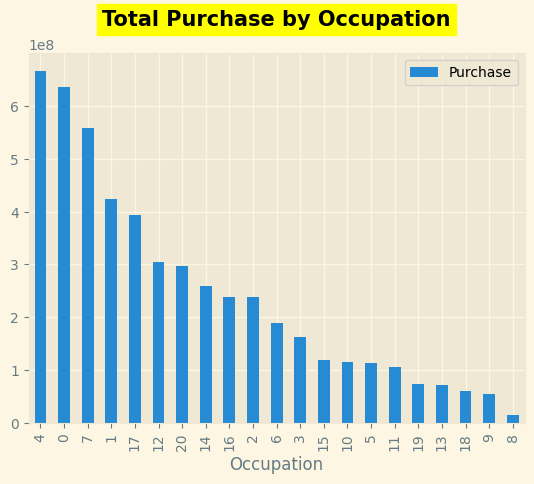

In [ ]:
ocu_pu=df[['Occupation','Purchase']].groupby('Occupation').sum()
ocu_pu=ocu_pu.sort_values(by='Purchase',ascending=False)
ocu_pu.plot(kind='bar')
plt.title("Total Purchase by Occupation",weight="bold",size=15, backgroundcolor='Yellow', pad =20)


# **Analysis by City_Category**

In [ ]:
df['City_Category'].value_counts(ascending = True)

A    147720
C    171175
B    231173
Name: City_Category, dtype: int64

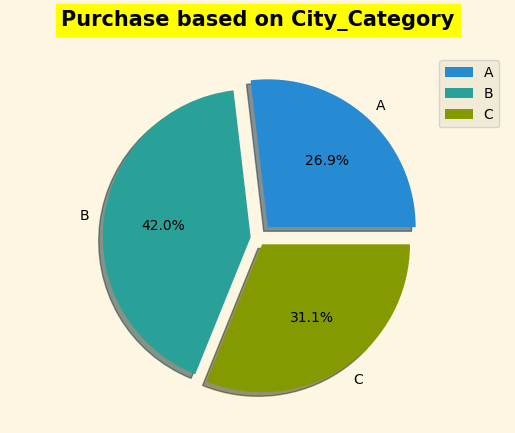

In [ ]:
labels = []
values = []
cityCatCount = []

for uniqueCityCategoryValue in df['City_Category'].sort_values().unique():
    CityCatPurchaserData = df.loc[df['City_Category'] == uniqueCityCategoryValue]
    CityCatPurchaserMean = np.mean(CityCatPurchaserData['Purchase'])
    labels.append(uniqueCityCategoryValue)
    values.append(CityCatPurchaserMean)
    cityCatCount.append(CityCatPurchaserData.shape[0])

values = cityCatCount
labels = ['A', 'B', 'C']
plt.axis('equal')

plt.pie(values, labels=labels,
              explode=[0.1,0.05,0.05],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Purchase based on City_Category',weight="bold",size=15, backgroundcolor='Yellow', pad =20)
plt.show()


Those who live in City category B buy more.



# **Analysis by Age**

In [ ]:
df['Age'].value_counts(ascending = True)

0-17      15102
55+       21504
51-55     38501
46-50     45701
18-25     99660
36-45    110013
26-35    219587
Name: Age, dtype: int64

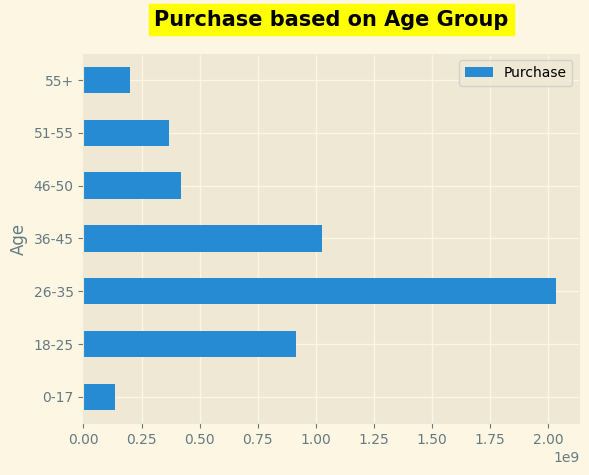

In [ ]:
age_pu=df[['Age','Purchase']].groupby('Age').sum()
age_pu.plot(kind='barh')
plt.title('Purchase based on Age Group',weight="bold",size=15, backgroundcolor='Yellow', pad =20)
plt.show()


Most of the Purchaser belong to 26-35 age group.

# **Product_Category by purchases**

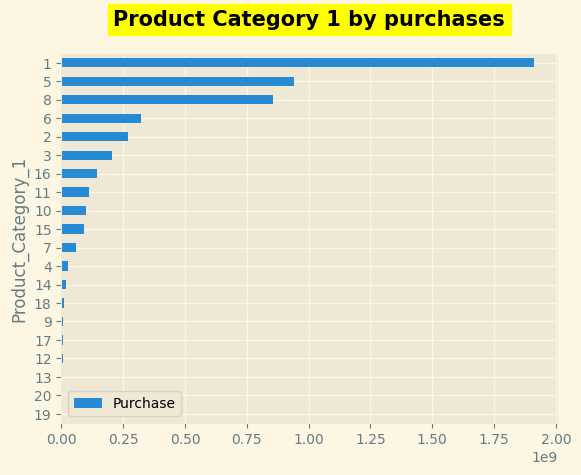

In [ ]:
prod1_pu=df[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum()
prod1_pu=prod1_pu.sort_values(by='Purchase')
prod1_pu.plot(kind='barh')
plt.title('Product Category 1 by purchases',weight="bold",size=15, backgroundcolor='Yellow', pad =20)
plt.show()

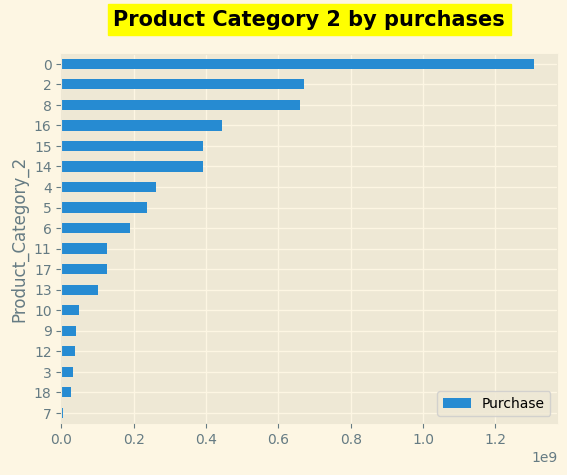

In [ ]:
prod2_pu=df[['Product_Category_2','Purchase']].groupby('Product_Category_2').sum()
prod2_pu=prod2_pu.sort_values(by='Purchase')
prod2_pu.plot(kind='barh')
plt.title('Product Category 2 by purchases',weight="bold",size=15, backgroundcolor='Yellow', pad =20)
plt.show()

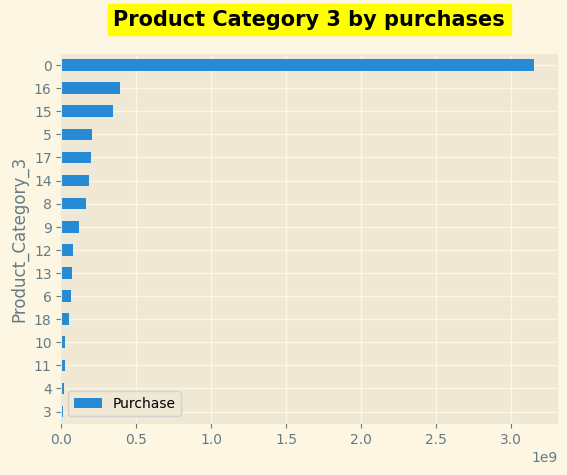

In [ ]:
prod3_pu=df[['Product_Category_3','Purchase']].groupby('Product_Category_3').sum()
prod3_pu=prod3_pu.sort_values(by='Purchase')
prod3_pu.plot(kind='barh')
plt.title('Product Category 3 by purchases',weight="bold",size=15, backgroundcolor='Yellow', pad =20)
plt.show()

# **Analysis**

P00265242 is the most popular product in the dataset.

P00370293 product minimum purchase

Maximum purchase of P0005284, which was dominated by males aged 26-35.

City_Category B was home to the majority of the inhabitants.

City_Category_B controls 42% of the buying market.

Total City Population_Category B -

*   Male Population: 57796

* Female Population 173377

* The married population is 94452 people.

* Population Unmarried - 136721

The male to female ratio is 3:1.

Men do 76.7% of all transactions.

There are 392 people aged 26 to 35 in total.

Where,

* Population of unmarried people - 250

* There are 223 men in the population.

The store should prioritize male merchandise for men aged 26 to 35.
The majority of purchasers are males from city category B; if there are more stores, sales will grow.







